# Plot Variable $n$-Satellite Simulations

In [1]:
import Interval_Matrix_Algebra_Calculator_v0 as imac
import portion as P
import dionysus as d
import numpy as np 
from itertools import permutations

import matplotlib.pyplot as plt

## Generate Simulations

In [2]:
from os_utilities import *
from orb_builder import *

orb_filenames = [] # used to keep track of what files to feed into soap

folder_name = "sim-2022-11-14"
prefix = "" # earth / moon / mars

n_list = [20, 30, 40, 50, 70, 100] # number of satellites to sample from starlink
# n_list = [20, 30] # number of satellites to sample from starlink
n = len(n_list)

folder = "./outputs/" + folder_name
make_folder(folder)

starlink = build_satellites_csv("starlink")
moon_sats = get_moon_platforms()
mars_sats = get_mars_platforms()
ground = [
    create_ground_object_dictionary("Ground-Albany", 42.685012663456163, -73.82479012295363, 0),
    create_ground_object_dictionary("Ground-Sydney", -33.868888888888889, 151.20939697339508, 0)
]
norad = build_satellites_from_tle("./sources/tdrss.tle")

In [3]:
for i in n_list:
    
    name = "starlink_a_{}".format(i)
    satellites = sample_sats(starlink, i)
    save_to_outputs_file(
            generate_orb(satellites, name),
            folder_name + "/" + name, "orb")
    
    # name = "starlink_b_{}".format(k)
    # satellites = sample_sats(starlink, k)
    # save_to_outputs_file(
    #         generate_orb(satellites, name),
    #         folder_name + "/" + name, "orb")

## Run SOAP

In [4]:
orb_files = get_ext_files(folder, "orb")
orb_filenames = []
for orb_file in orb_files:
    orb_filenames.append(orb_file.split("/")[-1])
# print(orb_filenames)

In [5]:
import subprocess

command = "wine"
soap_path = "/home/zeno/.wine/drive_c/SOAP/bin64/soap.exe"

for filename in orb_filenames:
#     print(filename)

    orb_path = "" + folder + "/" + filename + ""
    process = subprocess.Popen([command, soap_path, orb_path])
    # process = subprocess.Popen([command, soap_path, orb_path], stdout=subprocess.DEVNULL, stderr=subprocess.STDOUT)
    process.wait()

007c:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
007c:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
007c:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
007c:fixme:hid:handle_IRP_MN_QUERY_ID Unhandled type 00000005
0114:fixme:tasklist:wmain stub: L"tasklist" L"/nh" L"/fo" L"csv" L"/fi" L"Imagename eq soap64.exe" L"/fi" L"Status eq Running"
0104:fixme:wintab32:x11drv_tablet_info Return proper size
0104:fixme:win:NtUserFlashWindowEx 0x11f190 - semi-stub
0098:fixme:imm:ImeSetActiveContext (0000000000010026, 0): stub
0098:fixme:imm:ImmReleaseContext (0000000000010020, 0000000000010026): stub
0104:fixme:imm:ImeSetActiveContext (0000000000010050, 1): stub
0104:fixme:imm:ImmReleaseContext (000000000001006E, 0000000000010050): stub
0104:fixme:win:RegisterTouchWindow (000000000001006E 00000000): stub
0104:fixme:wgl:X11DRV_wglGetPixelFormatAttribivARB unsupported 2008 WGL Attribute
0104:fixme:msg:pack_message msg 80 (WM_SETICON) not supported yet
0104:fixme:msg:p

## Parse Contact Analysis Reports

In [3]:
def unit_matrix(m): # , start_time, end_time
    matrix = []
    for i in range(m):
        row = []
        for j in range(m):
            row.append(P.closed(-P.inf, P.inf))
        matrix.append(row)
    return matrix
        

A_list = []
B_list = []
m_list = []

for i in n_list:
    filename = folder + "/starlink_a_{} Contact Analysis.csv".format(i)
    A = imac.soapConverter(filename)
    A_list.append(A)
    # filename = folder + "/starlink_b Contact Analysis.csv"
    # B = imac.soapConverter(filename)

    m = len(A)
    m_list.append(m)

    B = unit_matrix(m)
    B_list.append(B)
    
    print("len(A_n) = {}, len(B_n) = {}, n = {}".format(m, len(B), i))

len(A_n) = 20, len(B_n) = 20, n = 20
len(A_n) = 30, len(B_n) = 30, n = 30
len(A_n) = 40, len(B_n) = 40, n = 40
len(A_n) = 50, len(B_n) = 50, n = 50
len(A_n) = 70, len(B_n) = 70, n = 70
len(A_n) = 100, len(B_n) = 100, n = 100


## Calculate Distances

In [4]:
from distances_tvg import *

In [5]:
start_time = 0
end_time = 86400

diagram_a_list = []
diagram_b_list = []
for i in range(n):
    break
    print("Generating Complement Diagrams Between A_n and B_n for n = {}".format(n_list[i]))
    diagram_a = tvg_to_complement_diagram_matrix(A_list[i], start_time, end_time)
    diagram_b = tvg_to_complement_diagram_matrix(B_list[i], start_time, end_time)
    
    diagram_a_list.append(diagram_a)
    diagram_b_list.append(diagram_b)

## Calculate Distances Between A_k and B_k

In [6]:
q = 2

wdist_infty_list = []
wdist_q_list = []
bdist_list = []

for i in range(n):
    break
    print("Calculating Distances Between A_n and B_n for n = {}".format(n_list[i]))
    diagram_a = diagram_a_list[i]
    diagram_b = diagram_b_list[i]
    m = m_list[i]
    
    wdist = tvg_interval_wasserstein_distance_matrix(diagram_a, diagram_b, m, 2)
    bdist = tvg_interval_bottleneck_distance_matrix(diagram_a, diagram_b, m)
    
    wdist_sup = sup_norm(wdist)
    wdist_q_norm = q_norm(wdist, q)
    bdist_sup = sup_norm(bdist)
    
    print("\twdist_sup = {}".format(wdist_sup))
    print("\tbdist_sup = {}".format(bdist_sup))
    print("\twdist_q = {}, for q = {}".format(wdist_q_norm, q))
    
    wdist_infty_list.append(wdist_sup)
    wdist_q_list.append(wdist_q_norm)
    bdist_list.append(bdist_sup)

## Distance on $k$-Walk TVG's

In [12]:
walk_length = 10

x = list(range(walk_length))
y_wdist_infty_list = []
y_wdist_q_list = []
y_bdist_list = []

A_walks = []

for i in range(n):
    m = m_list[i]
    A_walks.append([unit_matrix(m)]) # A_walks[i] = [A^0, A^1, ... A^k]

    y_wdist_infty = [0 for j in x]
    y_wdist_q = [0 for j in x]
    y_bdist = [0 for j in x]
    
    A_prev = None
    for k in range(1, walk_length):
        print("Calculating {}-Walks for {}-Sat system".format(k, n_list[i]))
        
        A = A_list[i]
        B = B_list[i]
        m = m_list[i]

        # TODO : double check with Brian
        if k == 1:
            # A_prev = A
            A_k = A
        else:
            A_k = imac.interval_matrix_mult(A_walks[i][-1], A)
            # A_prev = A_k
        A_walks[i].append(A_k)
        # A_k = imac.matrix_k_walk(A, k)
        B_k = B # imac.matrix_k_walk(B, k)
        
        diagram_a_k = tvg_to_complement_diagram_matrix(A_k, start_time, end_time)
        diagram_b_k = tvg_to_complement_diagram_matrix(B_k, start_time, end_time)
        
        wdist = tvg_interval_wasserstein_distance_matrix(diagram_a_k, diagram_b_k, m, 2)
        y_wdist_infty[k] = sup_norm(wdist)
        y_wdist_q[k] = q_norm(wdist, q)

        bdist = tvg_interval_bottleneck_distance_matrix(diagram_a_k, diagram_b_k, m)
        y_bdist[k] = sup_norm(bdist)
        
        print("\td_B(A_{2}^{0}, B_{2}^{0}) = {1}".format(k, sup_norm(bdist), n_list[i]))
        print("\td_W^2,infty(A_{2}^{0}, B_{2}^{0}) = {1}".format(k, sup_norm(wdist), n_list[i]))
        print("\td_W^2,q(A_{2}^{0}, B_{2}^{0}) = {1}, q = {2}".format(k, q_norm(wdist, q), q, n_list[i]))
        # print(A_walks[i])
    y_wdist_infty_list.append(y_wdist_infty)
    y_wdist_q_list.append(y_wdist_q)
    y_bdist_list.append(y_bdist)

Calculating 1-Walks for 20-Sat system
	d_B(A_20^1, B_20^1) = 43200.0
	d_W^2,infty(A_20^1, B_20^1) = 43200.0
	d_W^2,q(A_2^1, B_2^1) = 653125.8704825457, q = 2
Calculating 2-Walks for 20-Sat system
	d_B(A_20^2, B_20^2) = 43200.0
	d_W^2,infty(A_20^2, B_20^2) = 43200.0
	d_W^2,q(A_2^2, B_2^2) = 521920.6421915363, q = 2
Calculating 3-Walks for 20-Sat system
	d_B(A_20^3, B_20^3) = 43200.0
	d_W^2,infty(A_20^3, B_20^3) = 43200.0
	d_W^2,q(A_2^3, B_2^3) = 423072.41584853554, q = 2
Calculating 4-Walks for 20-Sat system
	d_B(A_20^4, B_20^4) = 43200.0
	d_W^2,infty(A_20^4, B_20^4) = 43200.0
	d_W^2,q(A_2^4, B_2^4) = 353968.77059288166, q = 2
Calculating 5-Walks for 20-Sat system
	d_B(A_20^5, B_20^5) = 34853.421875
	d_W^2,infty(A_20^5, B_20^5) = 34901.22265625
	d_W^2,q(A_2^5, B_2^5) = 303598.69781472464, q = 2
Calculating 6-Walks for 20-Sat system
	d_B(A_20^6, B_20^6) = 28441.28125
	d_W^2,infty(A_20^6, B_20^6) = 28482.73046875
	d_W^2,q(A_2^6, B_2^6) = 278150.75403345196, q = 2
Calculating 7-Walks for 2

	d_B(A_100^5, B_100^5) = 1667.04443359375
	d_W^2,infty(A_100^5, B_100^5) = 3973.394287109375
	d_W^2,q(A_2^5, B_2^5) = 44016.31988002987, q = 2
Calculating 6-Walks for 100-Sat system
	d_B(A_100^6, B_100^6) = 21.063159942626953
	d_W^2,infty(A_100^6, B_100^6) = 26.9329891204834
	d_W^2,q(A_2^6, B_2^6) = 68.76329556244795, q = 2
Calculating 7-Walks for 100-Sat system
	d_B(A_100^7, B_100^7) = 0.0
	d_W^2,infty(A_100^7, B_100^7) = 0.0
	d_W^2,q(A_2^7, B_2^7) = 0.0, q = 2
Calculating 8-Walks for 100-Sat system
	d_B(A_100^8, B_100^8) = 0.0
	d_W^2,infty(A_100^8, B_100^8) = 0.0
	d_W^2,q(A_2^8, B_2^8) = 0.0, q = 2
Calculating 9-Walks for 100-Sat system


KeyboardInterrupt: 

## Calculate Lifetime Matrices

In [8]:
y_lifetime_list = []
for l in range(n):
    A = A_list[l]
    m = m_list[l]
    L = tvg_lifetime_matrix(A, start_time, end_time, walk_length)
    
    y_list = []
    for i in range(0, m):
        for j in range(i + 1, m):
            y = []
            for k in range(0, walk_length):
                interval_sum = L[(k, i, j)]
                y.append(interval_sum)
            y_list.append(y)
            # ax.plot(x, y, label="{},{}".format(i, j))
        # interval_sum = L[(k, i, j)]
        # y.append(interval_sum)
        # print("L(mu^{})({}, {}) = {}".format(k, i, j, interval_sum))
    # print(len(y_list))            
    y_list_average = []
    for k in range(0, walk_length):
        average_sum = 0
        for y in y_list:
            average_sum += y[k]
        average = average_sum / len(y_list)
        y_list_average.append(average)
        
    y_lifetime_list.append(y_list_average)

Calculating 0-star
Calculating 1-star
Calculating 2-star
Calculating 3-star
Calculating 4-star
Calculating 5-star
Calculating 6-star
Calculating 7-star
Calculating 8-star
Calculating 9-star
Calculating 0-star
Calculating 1-star
Calculating 2-star
Calculating 3-star
Calculating 4-star
Calculating 5-star
Calculating 6-star
Calculating 7-star
Calculating 8-star
Calculating 9-star
Calculating 0-star
Calculating 1-star
Calculating 2-star
Calculating 3-star
Calculating 4-star
Calculating 5-star
Calculating 6-star
Calculating 7-star
Calculating 8-star
Calculating 9-star
Calculating 0-star
Calculating 1-star
Calculating 2-star
Calculating 3-star
Calculating 4-star
Calculating 5-star
Calculating 6-star
Calculating 7-star
Calculating 8-star


KeyboardInterrupt: 

## Plot Distances

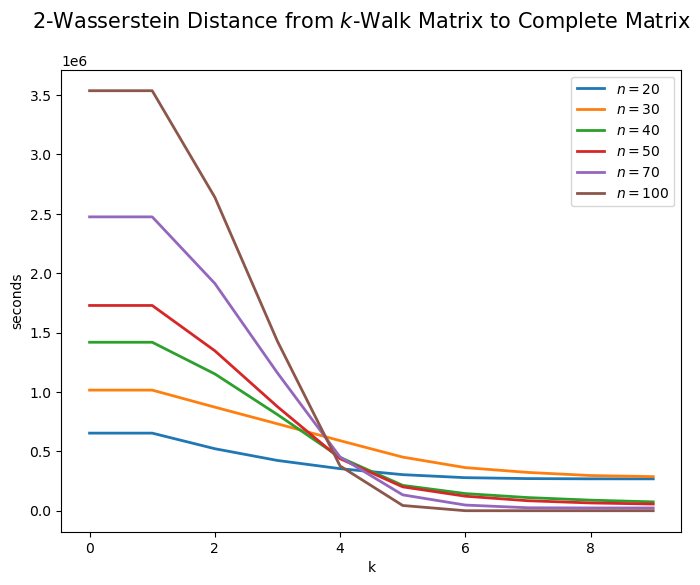

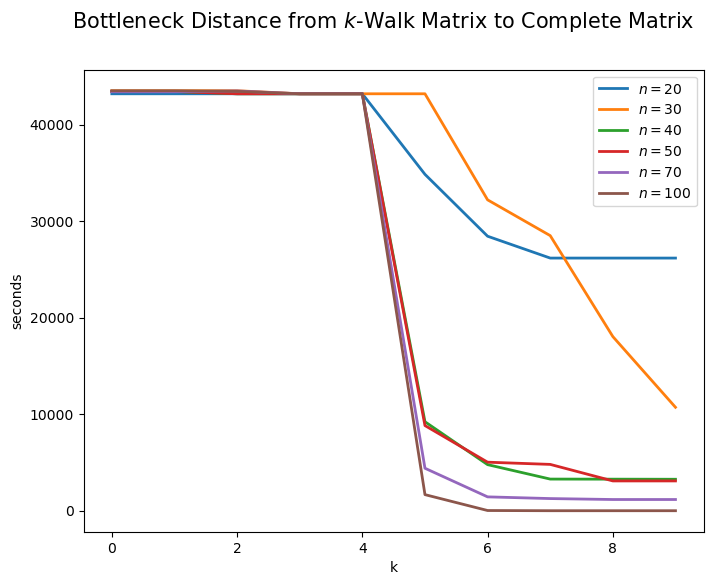

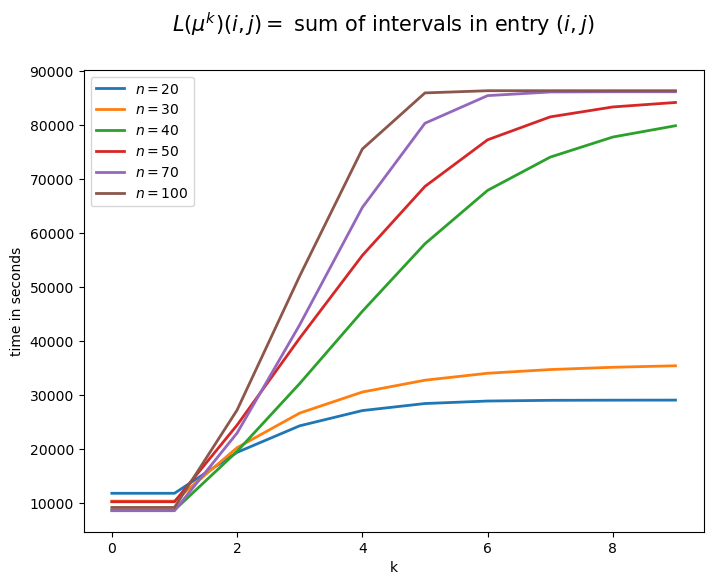

In [15]:
fig, ax = plt.subplots(1, figsize=(8, 6))
ax.set_xlabel('k')
ax.set_ylabel('seconds')
fig.suptitle('{}-Wasserstein Distance from $k$-Walk Matrix to Complete Matrix'.format(q), fontsize=15)
labels = []
for i in range(n):
    labels.append("$n = {}$".format(n_list[i]))
    y_wdist = y_wdist_q_list[i]
    ax.plot(x, y_wdist, linewidth=2)
plt.legend(labels)
plt.show()

fig, ax = plt.subplots(1, figsize=(8, 6))
ax.set_xlabel('k')
ax.set_ylabel('seconds')
fig.suptitle('Bottleneck Distance from $k$-Walk Matrix to Complete Matrix', fontsize=15)
for i in range(n):
    labels.append("$n = {}$".format(n_list[i]))
    y_bdist = y_bdist_list[i]
    ax.plot(x, y_bdist, linewidth=2)
plt.legend(labels)
plt.show()

fig, ax = plt.subplots(1, figsize=(8, 6))
ax.set_xlabel('k')
ax.set_ylabel('time in seconds')
fig.suptitle('$L(\mu^k)(i, j) = $ sum of intervals in entry $(i, j)$', fontsize=15)
for i in range(n):
    labels.append("$n = {}$".format(n_list[i]))
    ax.plot(x, y_lifetime_list[i], linewidth=2)
plt.legend(labels)
plt.show()